In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

In [5]:
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
import lightgbm as lgb

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.manifold import TSNE

In [9]:
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [39]:
import warnings
from functools import wraps

In [10]:
import xgboost as xgb

In [11]:
 from sklearn.preprocessing import Imputer
 from fancyimpute import KNN

Using TensorFlow backend.
/Users/poojachoudhary/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [12]:
gender_train = pd.read_csv("Widstrain.csv")

/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12,49,51,56,91,126,145,163,165,166,167,168,169,171,173,174,176,177,242,244,246,248,252,255,274,290,291,292,294,295,296,332,344,366,374,376,397,414,440,491,620,634,639,642,643,645,710,713,760,769,810,829,929,954,979,1001,1002,1003,1004,1005,1024,1037,1041,1043,1062,1086,1099,1100,1121,1129,1136,1152,1153,1166,1168,1182,1193,1204,1205,1207,1208,1216,1226,1228,1230,1232,1234) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
gender_train.shape

(18255, 1235)

In [14]:
gender_test = pd.read_csv("Widstest.csv")

/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,13,48,50,55,90,125,144,162,163,164,166,168,169,170,171,172,174,176,241,243,245,247,251,254,273,289,291,292,293,295,296,312,313,314,331,343,365,373,375,396,413,439,490,619,623,630,633,638,642,644,669,712,759,768,788,809,828,928,953,978,1000,1001,1002,1003,1004,1023,1036,1040,1042,1063,1085,1098,1099,1120,1128,1135,1151,1152,1165,1167,1181,1192,1204,1205,1206,1207,1215,1225,1227,1229,1231,1233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
gender_train.describe()

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,...,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
count,18255.000000,18255.000000,18255.000000,5653.000000,12602.000000,18255.000000,18255.000000,18255.000000,18255.000000,18255.000000,...,18255.000000,18255.000000,18255.000000,18255.000000,18255.000000,14230.000000,18255.000000,18255.000000,18255.000000,18255.000000
mean,9127.000000,2.371460,28.558313,3.138864,6.793525,291360.681676,8030.510600,352.038346,1978.073185,0.537113,...,2.397316,2.145330,2.151575,2.830731,2.835881,5.590654,6.763079,7.421912,8.925883,8.817365
std,5269.908918,1.130523,9.822629,1.361434,0.769568,98126.483799,22061.608061,179.744071,14.740675,0.498634,...,1.231487,1.407641,1.407021,1.594319,1.592863,18.210791,20.537281,21.752528,24.523345,24.413247
min,0.000000,1.000000,11.000000,1.000000,6.000000,111011.000000,96.000000,24.000000,1917.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4563.500000,1.000000,21.000000,2.000000,6.000000,216071.000000,949.000000,178.000000,1969.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9127.000000,2.000000,31.000000,3.000000,7.000000,313011.000000,2902.000000,354.000000,1981.000000,1.000000,...,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,13690.500000,3.000000,34.000000,4.000000,7.000000,348181.000000,4609.000000,523.000000,1990.000000,1.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,18254.000000,4.000000,44.000000,5.000000,8.000000,448051.000000,99999.000000,633.000000,2001.000000,1.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000


Text(0.5,0.98,'Level of Education')

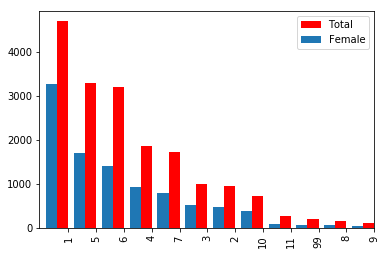

In [16]:
gender_train['DG4'].value_counts().plot(kind = 'bar',color='red',position=1,width =0.4,label = "Total")
gender_train[gender_train["is_female"]==1]['DG4'].value_counts().plot(kind = 'bar',position=2,width=0.4,label = "Female")
plt.legend()
fig = plt.figure()
fig.suptitle('Level of Education')

Text(0.5,0.98,'Work done in Last 12 months')

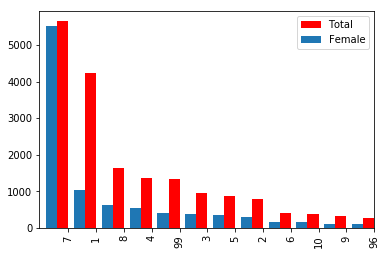

In [17]:
gender_train['DL1'].value_counts().plot(kind = 'bar',color='red',position=1,width =0.4,label = "Total")
gender_train[gender_train["is_female"]==1]['DL1'].value_counts().plot(kind = 'bar',position=2,width=0.4,label = "Female")
plt.legend()
fig = plt.figure()
fig.suptitle('Work done in Last 12 months')

Text(0.5,0.98,'Primary Source of Income')

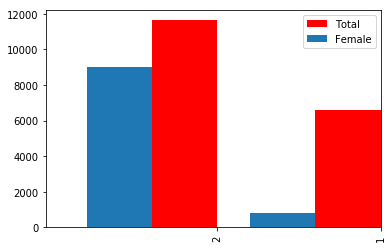

In [18]:
gender_train['DL0'].value_counts().plot(kind = 'bar',color='red',position=1,width =0.4,label = "Total")
gender_train[gender_train["is_female"]==1]['DL0'].value_counts().plot(kind = 'bar',position=2,width=0.4,label = "Female")
plt.legend()
fig = plt.figure()
fig.suptitle('Primary Source of Income')

# Data - Processing : Missing Values

In [24]:
pct_null = gender_train.isnull().sum() / len(gender_train)
missing_features = pct_null[pct_null > 0.8].index
missing_features

Index(['DG3A_OTHERS', 'DG4_OTHERS', 'DG13_1', 'DG13_2', 'DG13_3', 'DG13_4',
       'DG13_5', 'DG13_96', 'DG13_7', 'DG13_OTHERS',
       ...
       'FB28_2_OTHERS', 'FB28_3_OTHERS', 'FB28_4_OTHERS', 'FB28_96_OTHERS',
       'FB29_OTHERS', 'GN1_OTHERS', 'GN2_OTHERS', 'GN3_OTHERS', 'GN4_OTHERS',
       'GN5_OTHERS'],
      dtype='object', length=791)

# 791 features out of 1235 have more than 80% missing values

# Label Encoding

In [28]:
data = gender_train.fillna(-1)
y = np.array(data['is_female'])
data = data.drop(['is_female'], axis=1)
data2 = gender_test.fillna(-1)
data = data.append(data2)
print(data.shape)

(45540, 1235)


In [33]:
def ignore_warnings(f):
    @wraps(f)
    def inner(*args, **kwargs):
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("ignore")
            response = f(*args, **kwargs)
        return response
    return inner

In [40]:
@ignore_warnings
def start():
    label_encode = LabelEncoder()
    mat = np.array([])

    for i in range(1, data.shape[1]):
        tmp = np.array(data.ix[:,i])
        tmp_label_encode = label_encode.fit_transform(tmp)
        if i == 1:
            mat = tmp_label_encode
        else:
            mat = np.vstack((mat, tmp_label_encode))
            mat_new = mat.T
            print(mat_new.shape)
            
            np.save('train.npy', mat_new[:18255,:])
            np.save('test.npy', mat_new[18255:,:])
            np.save('y.npy', y)

# Imputed Data Set

In [46]:
x_train_n = np.load('train.npy')
x_test_n = np.load('test.npy')
y_train_n = np.load('y.npy')

(18255, 1234)

In [50]:
train_n, validation_n,y_n,val_y_n = cross_validation.train_test_split(x_train_n,y_train_n,test_size = 0.2
                                                                      ,random_state = 0)

# Random Forest

In [48]:
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)


In [52]:
classifier_RF.fit(train_n,y_n)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
y_predict_RF = classifier_RF.predict_proba(validation_n)
y_predict_RF = pd.DataFrame(y_predict_RF).iloc[:,1]

In [60]:
roc_auc_score(val_y_n,y_predict_RF)

0.94393734308350041

# XG Boost

In [28]:
dtrain = xgb.DMatrix(train_n,label = y_n)
dvalidation = xgb.DMatrix(validation_n,label = val_y_n)
xg = xgb.train(param_xg,dtrain,num_round) 
ypred=model.predict(dvalidation) 
ypred_n = pd.DataFrame(ypred).iloc[:,1]
roc_auc_score(val_y_n,ypred_n)

In [220]:
model = XGBClassifier(learning_rate =0.1, n_estimators=1000,max_depth=150, min_child_weight=1,gamma=0.1, subsample=0.6,
 colsample_bytree=0.8,objective= 'binary:logistic',nthread=5,scale_pos_weight=1,seed=27)
model.fit(train_n, y_n)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=150, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=5, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [221]:
ypred=model.predict_proba(validation_n) 
ypred_n = pd.DataFrame(ypred).iloc[:,1]
roc_auc_score(val_y_n,ypred_n)

0.96995745852824222

# XGBOOST - Normalised Data Set

In [84]:
scaler = preprocessing.StandardScaler().fit(train_n)
train_n_scale = scaler.transform(train_n)
validation_n_scale = scaler.transform(validation_n)


/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [66]:
model.fit(train_n_scale,y_n)
ypred=model.predict_proba(validation_n_scale) 
ypred_n = pd.DataFrame(ypred).iloc[:,1]
roc_auc_score(val_y_n,ypred_n)

0.96990819141794049

# Light GBM

In [269]:
param = {'num_leaves':50, 'objective':'binary','max_depth':-1,'learning_rate':.075,'max_bin':100,'subsample': 0.65,'min_data_in_leaf':40}
param['metric'] = ['auc']
num_round=400

In [270]:
train_data_n =lgb.Dataset(train_n,label=y_n)
lgbm_n=lgb.train(param,train_data_n,num_round)

In [271]:
ypred_train_n =lgbm_n.predict(validation_n)

In [272]:
roc_auc_score(val_y_n,ypred_train_n)

0.97059220573222071

In [252]:
ypred_test_n =lgbm_n.predict(x_test_n)
y_pred_test = pd.DataFrame(ypred_test_n)
y_pred_test.shape

(27285, 1)

In [253]:
y_pred_test.to_csv("Predict_LGM_n.csv")

# LGBM - Standardised Data Set

In [85]:
scaler = preprocessing.StandardScaler().fit(train_n)
train_n_scale = scaler.transform(train_n)
validation_n_scale = scaler.transform(validation_n)

/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
train_data_n =lgb.Dataset(train_n_scale,label=y_n)
lgbm_n=lgb.train(param,train_data_n,num_round)

In [87]:
ypred_train_n =lgbm_n.predict(validation_n_scale)
roc_auc_score(val_y_n,ypred_train_n)

0.96948452440213539